In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Loading the dataset
data_raw = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data_raw.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [4]:
#remove outcome from dataset (categorical)
data = data_raw.drop(columns=['Outcome'])

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


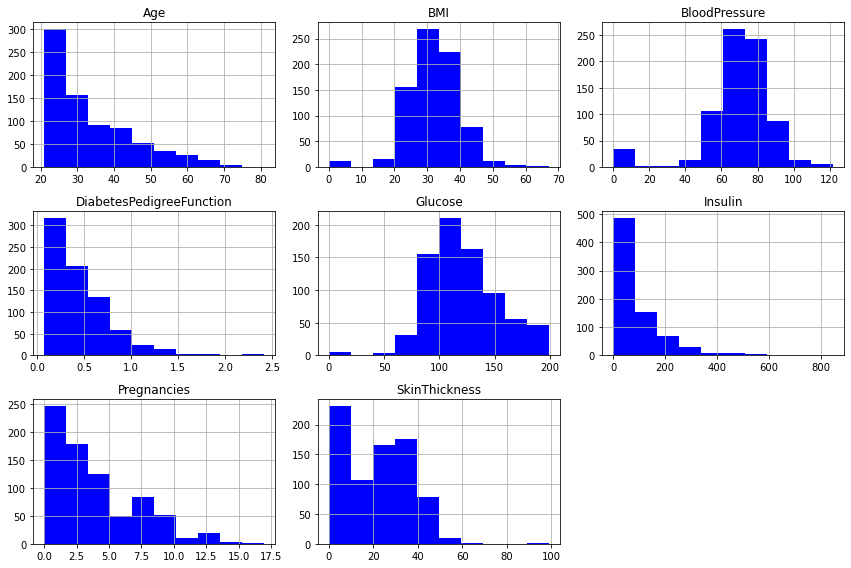

In [6]:
# (2) Histograms
data.hist(grid=True, figsize=(12,8), color='blue')
plt.tight_layout()
plt.show()

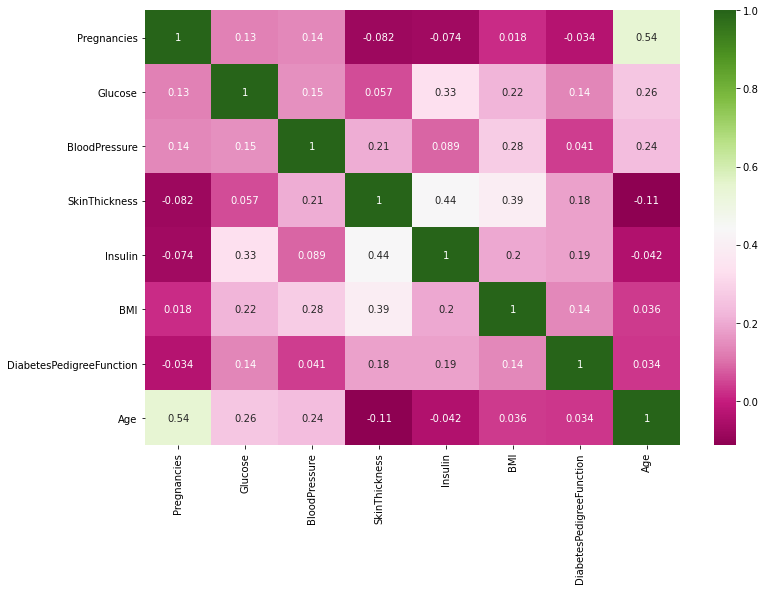

In [7]:
# (3) correlation matrices
corm = data.corr().values

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="PiYG")

In [8]:
# (4) Various Tests for PCA suitability
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

chi_square_value,p_value = calculate_bartlett_sphericity(data)
print('Chi square value: ', chi_square_value, '\n')
print('P-value: ', p_value)
if (p_value<0.05):print('The P-value is statistically significant\n')

kmo_all,kmo_model=calculate_kmo(data)

print('KMO Model: ', kmo_model)
if (kmo_model > 0.5):print('Sampling is adequate\n')

Chi square value:  956.1845305269898 

P-value:  1.2749976140864418e-183
The P-value is statistically significant

KMO Model:  0.5883561051209576
Sampling is adequate



In [9]:
# (5) Tranform data
data_std = StandardScaler().fit_transform(data) 

In [10]:
# (6) Run the PCA Method
n_components = len(data.columns)
pca = PCA(n_components).fit(data_std)

In [11]:
#eigenvectors
eigenvectors = np.round(pca.components_.transpose(),decimals=3)
print('Eigenvectors (Linear Coefficients): ')
pd.DataFrame(eigenvectors, index=data.columns, columns=["PC"+str(i) for i in range(1, n_components+1)])

Eigenvectors (Linear Coefficients): 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,0.128,0.594,-0.013,0.081,-0.476,0.194,-0.589,0.118
Glucose,0.393,0.174,0.468,-0.404,0.466,0.094,-0.060,0.450
BloodPressure,0.360,0.184,-0.535,0.056,0.328,-0.634,-0.192,-0.011
SkinThickness,0.440,-0.332,-0.238,0.038,-0.488,0.010,0.282,0.566
Insulin,0.435,-0.251,0.337,-0.350,-0.347,-0.271,-0.132,-0.549
BMI,0.452,-0.101,-0.362,0.054,0.253,0.685,-0.035,-0.342
DiabetesPedigreeFunction,0.271,-0.122,0.433,0.834,0.120,-0.086,-0.086,-0.008
Age,0.198,0.621,0.075,0.071,-0.109,-0.033,0.712,-0.212


In [12]:
#loading matrix using eigenvalues
eigenvalues = pca.explained_variance_
load_matrix = (np.sqrt(eigenvalues)*eigenvectors).round(3)
print('Loading Matrix: ')
pd.DataFrame(load_matrix, index=data.columns, columns=["PC"+str(i) for i in range(1, n_components+1)])

Loading Matrix: 


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,0.185,0.782,-0.013,0.076,-0.416,0.160,-0.382,0.075
Glucose,0.569,0.229,0.475,-0.378,0.407,0.078,-0.039,0.286
BloodPressure,0.521,0.242,-0.543,0.052,0.287,-0.524,-0.124,-0.007
SkinThickness,0.637,-0.437,-0.242,0.036,-0.426,0.008,0.183,0.360
Insulin,0.630,-0.330,0.342,-0.328,-0.303,-0.224,-0.086,-0.349
BMI,0.655,-0.133,-0.368,0.051,0.221,0.566,-0.023,-0.218
DiabetesPedigreeFunction,0.392,-0.161,0.440,0.781,0.105,-0.071,-0.056,-0.005
Age,0.287,0.818,0.076,0.066,-0.095,-0.027,0.462,-0.135


In [13]:
var_expln = (pca.explained_variance_ratio_*100).round(2)
eigval = (-np.sort(-eigenvalues)).round(3)
npc = 6 # display

print("Eigenvalues                      :",eigval[0:npc])
print("Eigenvalues (%Explained_Variance):",var_expln[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(var_expln[0:npc]))

Eigenvalues                      : [2.097 1.733 1.031 0.877 0.763 0.684]
Eigenvalues (%Explained_Variance): [26.18 21.64 12.87 10.94  9.53  8.53]
Eigenvalues (%Cumulative)        : [26.18 47.82 60.69 71.63 81.16 89.69]


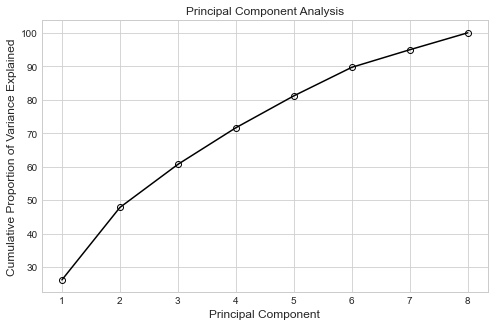

In [14]:
# pareto chart

num_vars= len(data.columns)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(var_expln)
plt.plot(sing_vals, cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

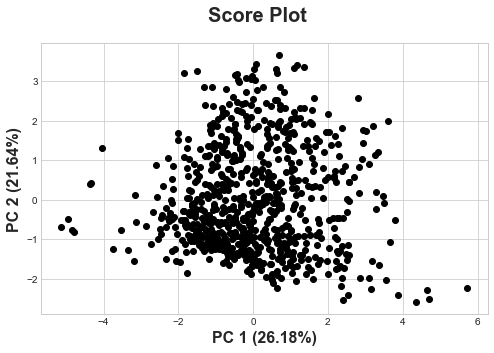

In [15]:
# Score Plot - scatterplot of new dataset with PC1 and PC2 
fig = plt.figure(figsize=(8,5))
fig.suptitle('Score Plot',fontsize=20,weight='bold')
plt.xlabel('PC 1 ('+str(var_expln[0])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC 2 ('+str(var_expln[1])+'%)',fontsize=16,weight='bold')
new_reduced_dataset = pca.transform(data_std) # used for downstream analytics
plt.scatter(new_reduced_dataset[:,0],new_reduced_dataset[:,1],color='black')
plt.show(); fig.savefig('ScorePlot.pdf')

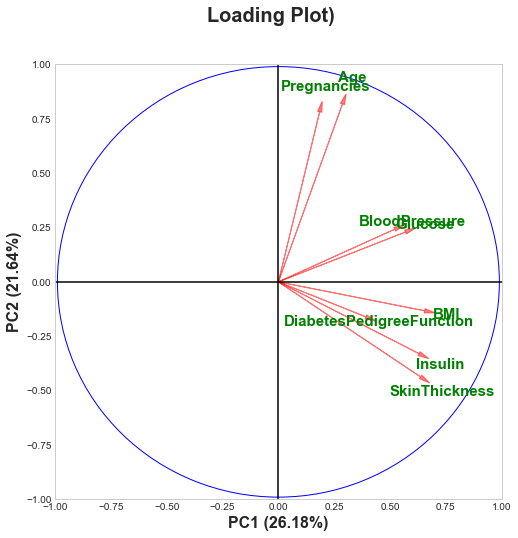

In [16]:
# Loadings Plot
p1=1; p2=2
coeff = load_matrix[:,p1-1:p2]
fig = plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
fig.suptitle('Loading Plot)',fontsize=20,weight='bold')
plt.xlabel('PC'+str(p1)+' ('+str(var_expln[p1-1])+'%)',fontsize=16,weight='bold')
plt.ylabel('PC'+str(p2)+' ('+str(var_expln[p2-1])+'%)',fontsize=16,weight='bold')

for i in range(len(coeff[:,0])):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color='r',
              alpha=0.5,head_width=0.02, head_length=0.05)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,data.columns[i],fontsize=15,
             color='g',ha='center',va='center',weight='bold')

circle = plt.Circle((0, 0), 0.99,  color='b', fill=False)
ax = fig.gca(); ax.add_artist(circle)
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid();
plt.show(); fig.savefig('Loadings.pdf')

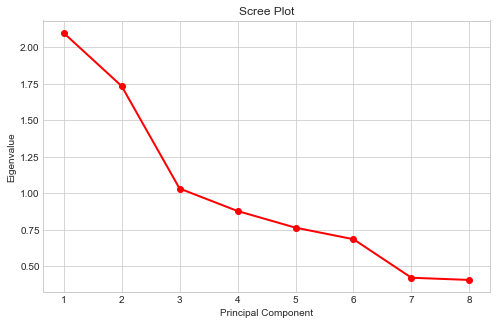

In [17]:
## scree plot, eigval from covar
num_vars= len(data.columns)
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1

plt.plot(sing_vals, eigval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [18]:
# compute the communilaties for number of PC

rows = []
col = []
loadings_sq = (load_matrix*load_matrix).round(3) #square matrix

for i in range(1, n_components+1):
    communality = np.sum(loadings_sq[:,0:i],axis=1).tolist()
    col.append(str(i)+"PCs")
    rows.append(communality)

df = pd.DataFrame(rows, columns=data.columns, index=col).T
df

,1PCs,2PCs,3PCs,4PCs,5PCs,6PCs,7PCs,8PCs
Pregnancies,0.034,0.646,0.646,0.652,0.825,0.851,0.997,1.003
Glucose,0.324,0.376,0.602,0.745,0.911,0.917,0.919,1.001
BloodPressure,0.271,0.330,0.625,0.628,0.710,0.985,1.000,1.000
SkinThickness,0.406,0.597,0.656,0.657,0.838,0.838,0.871,1.001
Insulin,0.397,0.506,0.623,0.731,0.823,0.873,0.880,1.002
BMI,0.429,0.447,0.582,0.585,0.634,0.954,0.955,1.003
DiabetesPedigreeFunction,0.154,0.180,0.374,0.984,0.995,1.000,1.003,1.003
Age,0.082,0.751,0.757,0.761,0.770,0.771,0.984,1.002


# Using PCA for model training

In [19]:
#Data preparation
    
X = data_raw.drop(columns='Outcome')
y = data_raw['Outcome']

#Train/Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

#data standardization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [27]:
#this function take in dataframe and trained model as input
#this function will output number of components use for PCA and model accuracy result after PCA

def model_pca_score(df_in, model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        
    n_comp_range = np.arange(1,len(df.columns)+1)
    acc_score = []
    n_comp = []

    for i in (n_comp_range):

        pca = PCA(i).fit(X_train)

        #Transform data with pca model
        train_pca = pca.transform(X_train)
        test_pca = pca.transform(X_test)
        model.fit(train_pca, y_train)

        # Accuracy of model score
        acc_score.append(model.score(test_pca, y_test))
        n_comp.append(i)

    for j in range (len(n_comp)):

        if acc_score[j]==np.max(acc_score):
            best_n_comp = n_comp[j]
            print('Best accuracy score:', acc_score[j])
            print('Number of PC with best accuracy score: ', best_n_comp)
            
    fig = plt.figure(figsize=(8,5))
    plt.xlabel('Number of Principal Component')
    plt.ylabel('Accuracy score on Test data')
    plt.plot(n_comp_range, acc_score,'ro-', linewidth=2)    
    plt.show()

## Logistic Regression

In [28]:
#Logistic regression model score without PCA
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.73828125

Best accuracy score: 0.74609375
Number of PC with best accuracy score:  6
Best accuracy score: 0.74609375
Number of PC with best accuracy score:  7


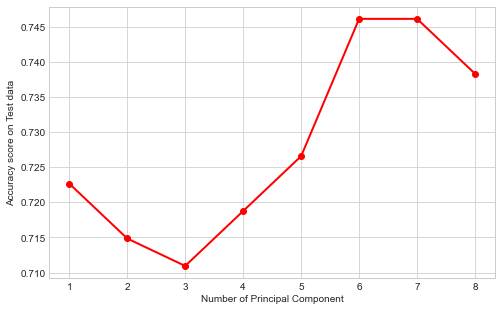

In [29]:
#logistic regression score with PCA
model_pca_score(data_raw, log_reg)

## K-NN

In [30]:
#KNN model score without PCA
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.734375

Best accuracy score: 0.75
Number of PC with best accuracy score:  5


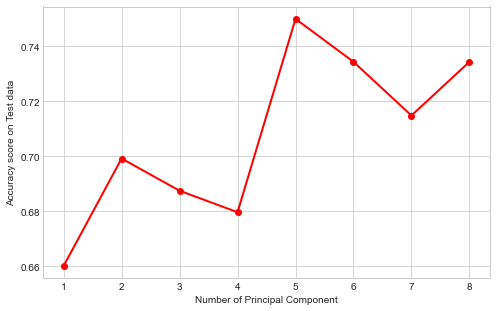

In [31]:
#knn model score with PCA
model_pca_score(data_raw, knn)

## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.73828125

Best accuracy score: 0.734375
Number of PC with best accuracy score:  6


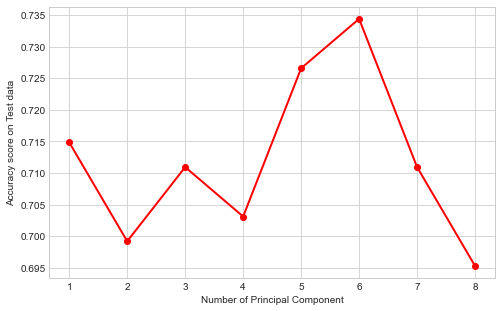

In [33]:
#Naive Bayes model score with PCA
model_pca_score(data_raw, gnb)